##  **Clustering Assignment**

* Clustering is an 'unsupervised machine learning method' of identifying and grouping similar data points in larger datasets without concern for the specific outcome.
* Clustering (sometimes called cluster analysis) is usually used to classify data into structures that are more easily understood and manipulated
* Clustering is useful because it can help to find problems in the data, such as outliers.
* It can also be used to improve the accuracy of machine learning models by providing more information about the structure of the data.





In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering     #for Hierarchical clustering
from sklearn.cluster import KMeans                      #for K-Means Clustering
from sklearn.cluster import DBSCAN                      #for Density Based Spatial Clustering of Applications with Noise

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler      #for Feature scaling

Problem 1:<br>
Perform Clustering (Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.<br>



Data Description:


> Murder -- Muder rates in different places of United States


> Assualt- Assualt rate in different places of United States


> UrbanPop - urban population in different places of United States


> Rape - Rape rate in different places of United States

In [5]:
#Importing data

crime_df=pd.read_csv('/content/sample_data/crime_data.csv')
crime_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
features=crime_df.iloc[:,1:]
features.head(5)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
crime_df.shape

(50, 5)

### **Scaling**
Feature scaling is the process of normalizing the range of features in a dataset.

In [8]:
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(features)

In [9]:
scaled_features

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [10]:
scaled_features.shape

(50, 4)

## Clustering Techniques

### **1: Hierarchical clustering**

In [11]:
model_h=AgglomerativeClustering(n_clusters=3,affinity='l2',linkage='complete')
model_h.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1])

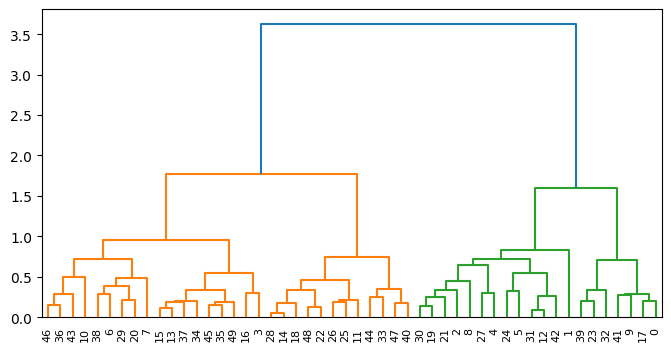

In [12]:
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

xdist=pdist(scaled_features,metric='euclidean')
linked=linkage(xdist,'ward')

plt.figure(figsize=(8,4))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.show();

In [13]:
model2_h=AgglomerativeClustering(n_clusters=3,affinity='l2',linkage='complete')
model2_h.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1])

### **2: K-Means Clustering**

In [14]:
model_k=KMeans(n_clusters=3)
model_k.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [15]:
model_k.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.69467343, 0.73395818, 0.61552186, 0.56629947],
       [0.31425703, 0.33866058, 0.68361582, 0.31122595]])

### **3:Example for  DBSCAN Clustering**

In [16]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [17]:
x,y=make_moons(100)


In [ ]:
x

array([[ 1.15959990e+00, -4.87181783e-01],
       [ 2.05460725e-03,  4.35929780e-01],
       [-4.62538290e-01,  8.86599306e-01],
       [ 7.61445958e-01,  6.48228395e-01],
       [ 1.80141362e+00, -9.81105305e-02],
       [ 1.61911895e-01, -4.55349012e-02],
       [-2.22520934e-01,  9.74927912e-01],
       [-8.01413622e-01,  5.98110530e-01],
       [ 1.59599895e-01,  9.87181783e-01],
       [ 9.67294863e-01,  2.53654584e-01],
       [ 2.22520934e-01,  9.74927912e-01],
       [-7.61445958e-01,  6.48228395e-01],
       [ 1.62348980e+00, -2.81831482e-01],
       [ 8.71318704e-01,  4.90717552e-01],
       [-6.72300890e-01,  7.40277997e-01],
       [ 8.01413622e-01,  5.98110530e-01],
       [ 1.96729486e+00,  2.46345416e-01],
       [ 1.98586378e-01, -9.81105305e-02],
       [ 1.57211666e+00, -3.20172255e-01],
       [-3.20515776e-02,  9.99486216e-01],
       [ 1.99179001e+00,  3.72122838e-01],
       [ 8.38088105e-01,  5.45534901e-01],
       [ 6.23489802e-01,  7.81831482e-01],
       [ 1.

In [18]:
x.shape

(100, 2)

In [19]:
y

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [20]:
y.shape

(100,)

<ipython-input-21-bf0c83d6a73c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


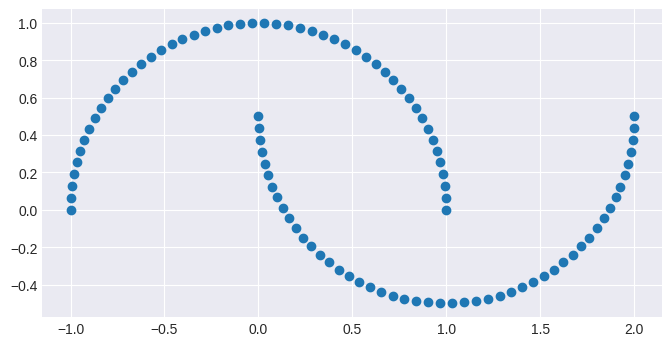

In [21]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(x[:,0],x[:,1]);

In [22]:
model_d1=DBSCAN(min_samples=2,eps=0.1)
model_d1.fit_predict(x)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

<ipython-input-23-dfbd0065fe93>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


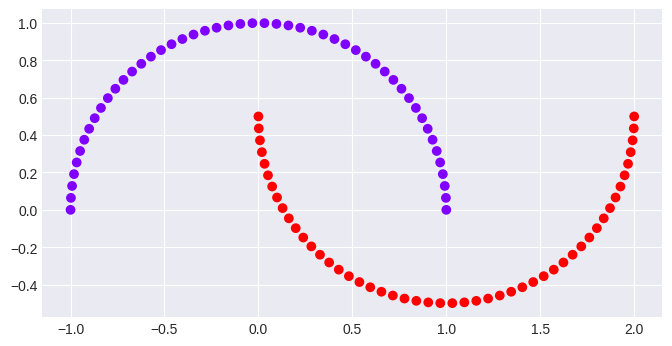

In [23]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(x[:,0],x[:,1],c=model_d1.fit_predict(x),cmap=plt.cm.rainbow_r);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-24-0bc7229356b8>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


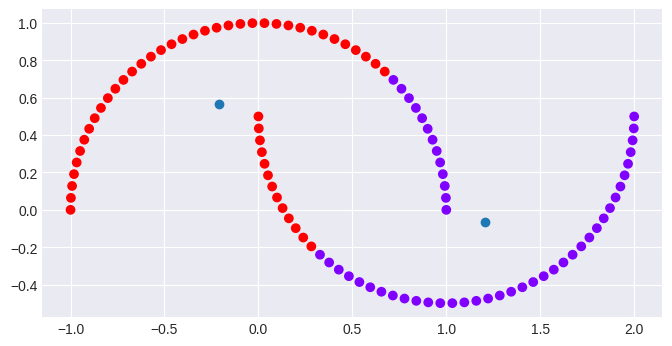

In [24]:
model_k1=KMeans(n_clusters=2)
model_k1.fit_predict(x)

plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(model_k1.cluster_centers_[:,0],model_k1.cluster_centers_[:,1])
plt.scatter(x[:,0],x[:,1],c=model_k1.fit_predict(x),cmap=plt.cm.rainbow_r)
plt.show();

In [25]:
model_k1.cluster_centers_

array([[-0.20824586,  0.56410191],
       [ 1.20824586, -0.06410191]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-26-cb691ab2195a>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


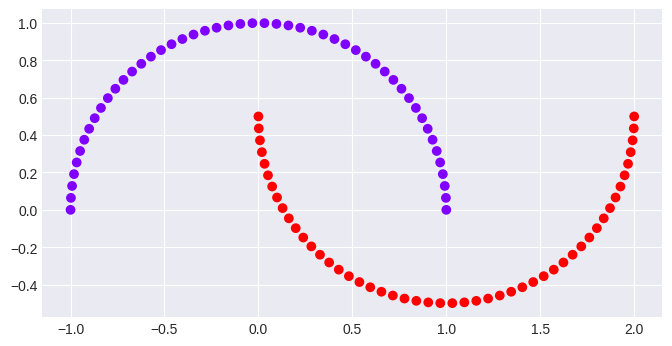

In [26]:
model_h1=AgglomerativeClustering(n_clusters=2,affinity="l2",linkage="single")

model_h1.fit_predict(x)
plt.figure(figsize=(8,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(x[:,0],x[:,1],c=model_h1.fit_predict(x),cmap=plt.cm.rainbow_r)

## Evaluation

### **1: Elbow Method for KMeans Clustering**

In [27]:
k=[]

for i in range(1,11):
  model=KMeans(n_clusters=i)
  model.fit(scaled_features)
  k.append(model.inertia_)

k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[13.184122550256447,
 6.596893867946196,
 5.01849999148911,
 3.690820410392111,
 3.1842618139677223,
 2.816898948646588,
 2.5592348723478606,
 2.3647866176613723,
 2.091084220491808,
 1.872775683232274]

<ipython-input-28-7f55883dcd45>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


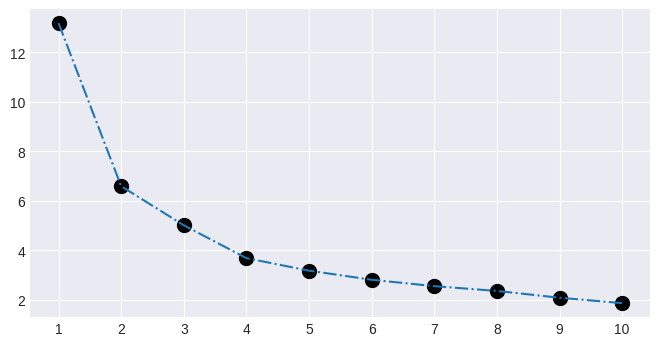

In [28]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(range(1,11),k,s=100,color='black')
plt.plot(range(1,11),k,linestyle='-.')
plt.xticks(range(1,11))
plt.show();

**Elbow Method** : In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

---


> By Elbow Method for Kmeans clustering we got that there shold be 2 clusters.

### **2: Silhouette Method for all Clustering techniques**

In [29]:
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

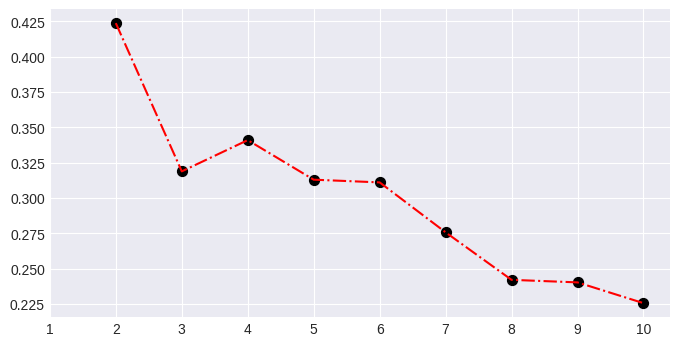

0.42364457559625074 for 2 clusters


[0.42364457559625074,
 0.3187755079997931,
 0.34089035600743633,
 0.3128951684561415,
 0.31097650286862477,
 0.27565805153020245,
 0.24203288783180898,
 0.24023503543352867,
 0.22555239879969122]

In [30]:
#for KMean clustering technique

nc=range(2,11)
l=[]
for i in nc:
  model=KMeans(n_clusters=i)
  #model.fit_predict(scaled_fearures)
  l.append(silhouette_score(scaled_features,model.fit_predict(scaled_features)))



#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();

# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

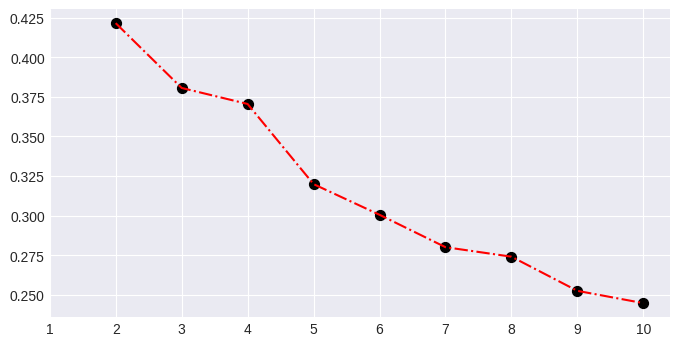

0.42150616000142505 for 2 clusters


[0.42150616000142505,
 0.38059562824644055,
 0.3704827187736578,
 0.31987844617667754,
 0.30052255992323545,
 0.2800727866038942,
 0.2740761050924829,
 0.2525035359621213,
 0.24474886347671315]

In [31]:
#for hierarchical clustering technique with affinity='l1'and linkage='average'

nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity='l1',linkage='average')
  l.append(silhouette_score(scaled_features,model.fit_predict(scaled_features)))


#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();




# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

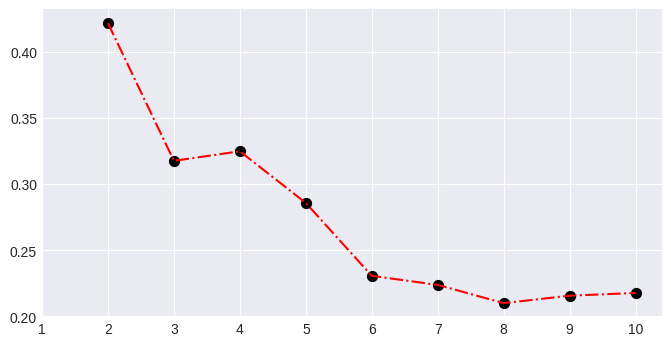

0.42150616000142505 for 2 clusters


[0.42150616000142505,
 0.3174819581729578,
 0.32468820461360415,
 0.2856589857160643,
 0.23060241591245334,
 0.2237450913021125,
 0.20996972769488906,
 0.21558940186596345,
 0.21765883871596808]

In [32]:
#for hierarchical clustering technique with affinity='l1'and linkage='complete'

nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity='l1',linkage='complete')
  l.append(silhouette_score(scaled_features,model.fit_predict(scaled_features)))


#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();




# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

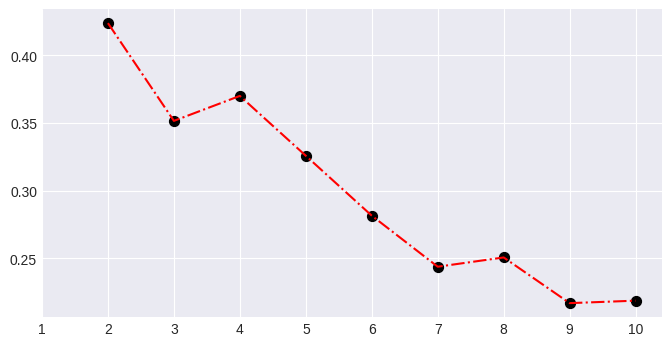

0.42364457559625074 for 2 clusters


[0.42364457559625074,
 0.35149572430421583,
 0.36992391140277175,
 0.3257478134255528,
 0.2815096427769605,
 0.24382999528072172,
 0.2506774565216013,
 0.2169454704716504,
 0.21877737263827413]

In [33]:
#for hierarchical clustering technique with affinity='l2'and linkage='average'

nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage='average')
  l.append(silhouette_score(scaled_features,model.fit_predict(scaled_features)))


#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();




# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

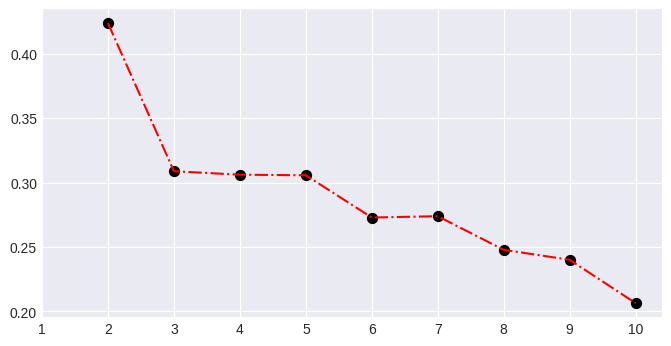

0.42364457559625074 for 2 clusters


[0.42364457559625074,
 0.30877213909512063,
 0.3060729442426308,
 0.3056360903608855,
 0.2728435659779423,
 0.27387642168206544,
 0.24780604916967508,
 0.2400551166172384,
 0.20643912850693227]

In [34]:
#for hierarchical clustering technique with affinity='l2'and linkage='complete'

nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage='complete')
  l.append(silhouette_score(scaled_features,model.fit_predict(scaled_features)))


#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();




# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

l

 **Silhouette score** :Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.Silhouette score is higher the better.<br>


---


We calculated silhouette score for different clustering techniques<br>

Representing highest Silhouette score for each technique:<br>
1. For KMean clustering technique:
> 0.42364457559625074 for 2 clusters

2. For hierarchical clustering technique with affinity='l1'and linkage='average'
> 0.42150616000142505 for 2 clusters

3. For hierarchical clustering technique with affinity='l1'and linkage='complete'
> 0.42150616000142505 for 2 clusters

4. For hierarchical clustering technique with affinity='l2'and linkage='average'
> 0.42364457559625074 for 2 clusters

5. For hierarchical clustering technique with affinity='l2'and linkage='complete'
> 0.42364457559625074 for 2 clusters





*   We will avoid using 'single' as  linkage because it mainly focus on the structure




**We will go ahed with 2 clusters**



---



---


#Clustering on Airlines dataset

Problem 2:<br>
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
Draw the inferences from the clusters obtained.

Data Description:

> The file EastWestAirlines contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers




> ID --Unique ID

> Balance--Number of miles eligible for award travel

> Qual_mile--Number of miles counted as qualifying for Topflight status

> cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

> cc2_miles -- Number of miles earned with Rewards credit card
in the past 12 months:

> cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

> 1 = under 5,000 <br>
 2 = 5,000 - 10,000 <br>
 3 = 10,001 - 25,000<br>
 4 = 25,001 - 50,000<br>
 5 = over 50,000

> Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

> Bonus_trans--Number of non-flight bonus transactions in the past 12 months

> Flight_miles_12mo--Number of flight miles in the past 12 months

> Flight_trans_12--Number of flight transactions in the past 12 months

> Days_since_enrolled--Number of days since enrolled in flier program

> Award--whether that person had award flight (free flight) or not




In [35]:
#Importing data
#uploading excel 2nd sheet

airlines=pd.read_excel('/content/sample_data/EastWestAirlines.xlsx','data')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [36]:
airlines.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [37]:
airlines.shape

(3999, 12)

In [ ]:
airlines.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [38]:
airlines['ID#'].value_counts()

ID#
1       1
2691    1
2678    1
2679    1
2680    1
       ..
1351    1
1352    1
1353    1
1354    1
4021    1
Name: count, Length: 3999, dtype: int64

In [39]:
airlines['ID#'].nunique()

3999

In [40]:
airlines['ID#'].unique()

array([   1,    2,    3, ..., 4019, 4020, 4021])

In [41]:
airlines['ID#'].duplicated().value_counts()

ID#
False    3999
Name: count, dtype: int64

In [42]:
#Each id is unique as there is no duplicate value in 'ID#' column

In [43]:
features=airlines.iloc[:,1:]

In [44]:
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(features)
print(scaled_features)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


**CLUSTERING TECHNIQUES**

### **Hierarchical clustering**

In [45]:
model=AgglomerativeClustering(n_clusters=3,affinity="l2",linkage="complete")
model.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, ..., 0, 2, 2])

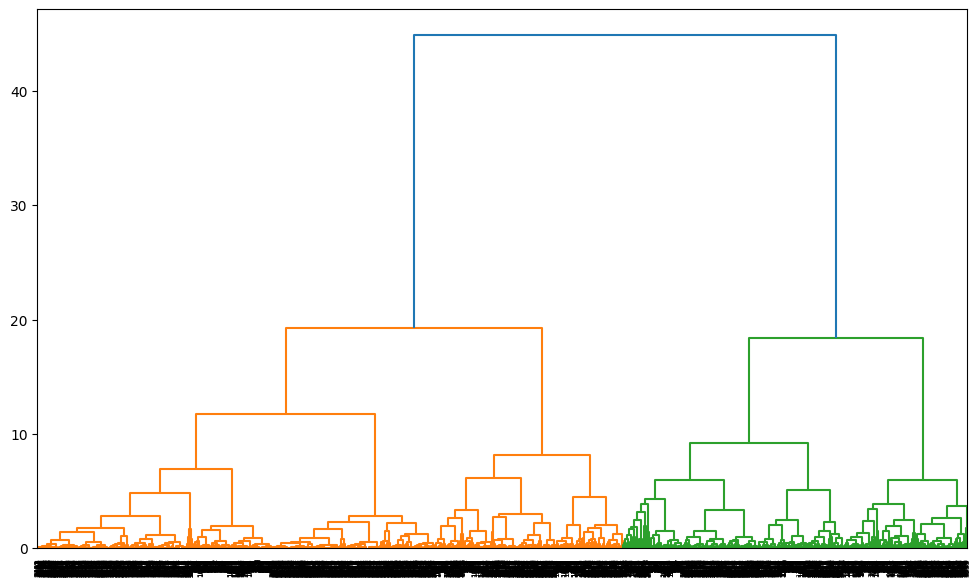

In [ ]:
#Plotting Dendrogram

from sklearn.cluster import AgglomerativeClustering           #for hirarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist                      #Spatial distance refers to the measurement of the separation
                                                              #between two or more points in space.
from matplotlib import pyplot as plt

xdist=pdist(scaled_features,metric='euclidean')
linked=linkage(xdist,'ward')                                  #Ward's method means calculating the incremental sum of squares

plt.figure(figsize=(12,7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)                             #distance_sort='descending'  ????  ,show_leaf_counts=True ????

plt.show()


### **KMeans clustering**

In [46]:
model=KMeans(n_clusters=3)
model.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [47]:
model.cluster_centers_

array([[ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -2.77555756e-16],
       [ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01,  7.21644966e-16],
       [ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00]])

 **DBSCAN clustering** --is not possible beause there are more than 2 features

**Evaluation**

###**Elbow Method for KMeans clustering**

In [48]:
l=[]
for i in range(1,11):
  model=KMeans(n_clusters=i)
  model.fit(scaled_features)
  l.append(model.inertia_)

l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[1830.793212858411,
 823.6756984125209,
 625.1684881570724,
 436.70885761932567,
 348.9433217254141,
 315.14818830150585,
 287.9293834740548,
 263.1959513886113,
 243.91664703659058,
 226.10851784978172]

<ipython-input-49-084b7f0d19b1>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


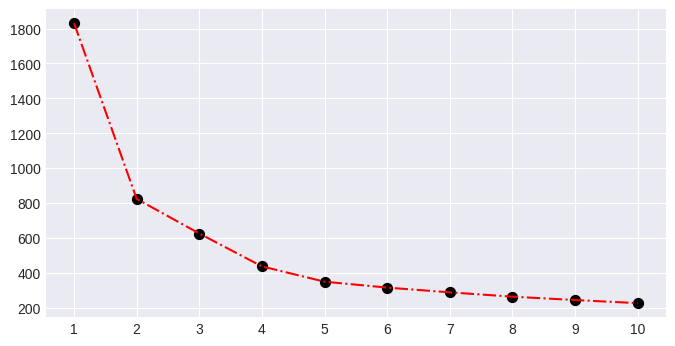

In [49]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(range(1,11),l,s=50,color='black')
plt.plot(range(1,11),l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();

Elbow point is at 2 ,Therefore there should be 2 clusters.

###**Silhouette Method for all clustering techniques**

In [50]:
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

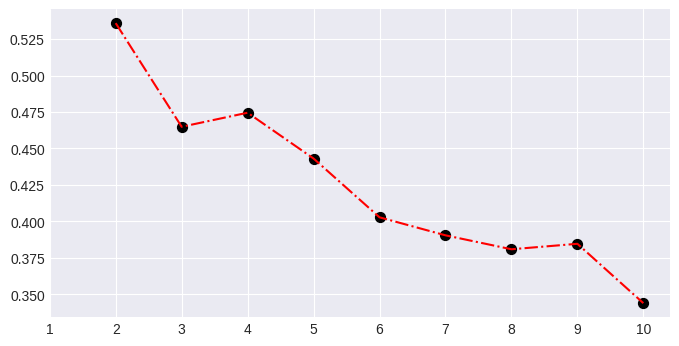

[0.535930510919477,
 0.46484529388583046,
 0.4744941579482721,
 0.4430672072796034,
 0.4027477317323024,
 0.3904051693222737,
 0.38083842933577705,
 0.38459180754531325,
 0.34388965739356536]

In [51]:
#for KMean clustering technique

nc=range(2,11)
l=[]
for i in nc:
  model=KMeans(n_clusters=i)
  #model.fit_predict(scaled_fearures)
  l.append(silhouette_score(scaled_features,model.fit_predict(scaled_features)))



#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();


l

In [52]:
# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

0.535930510919477 for 2 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

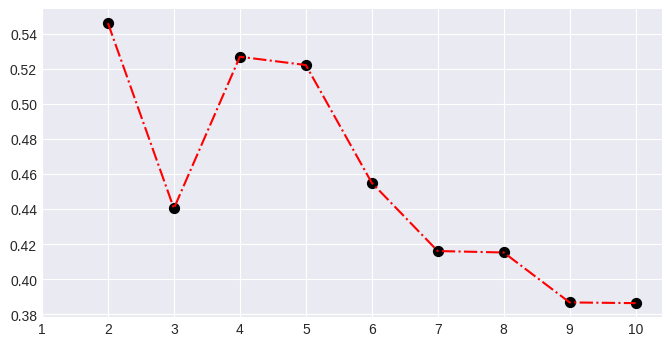

[0.5460574674055123,
 0.4404056635334302,
 0.5268941425720746,
 0.5221752413547429,
 0.4549821830518893,
 0.4160803855658161,
 0.4152529462975249,
 0.38677638239588863,
 0.3863635929394707]

In [53]:
#for hierarchical clustering technique with affinity='l1'and linkage='single'

nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity='l1',linkage='single')
  l.append(silhouette_score(scaled_features,model.fit_predict(scaled_features)))


#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();


l

In [54]:
# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

0.5460574674055123 for 2 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

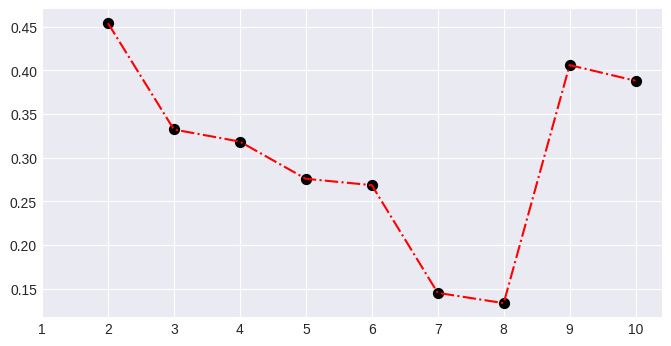

[0.45418920710462085,
 0.3323917935404542,
 0.31852848618488866,
 0.27594827838415237,
 0.2686786424552447,
 0.14529921812056693,
 0.13354014692025812,
 0.4061606621782466,
 0.38819381324443597]

In [55]:
#for hierarchical clustering technique with affinity='l1'and linkage='average'

nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity='l1',linkage='average')
  l.append(silhouette_score(scaled_features,model.fit_predict(scaled_features)))


#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();


l

In [56]:
# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

0.45418920710462085 for 2 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

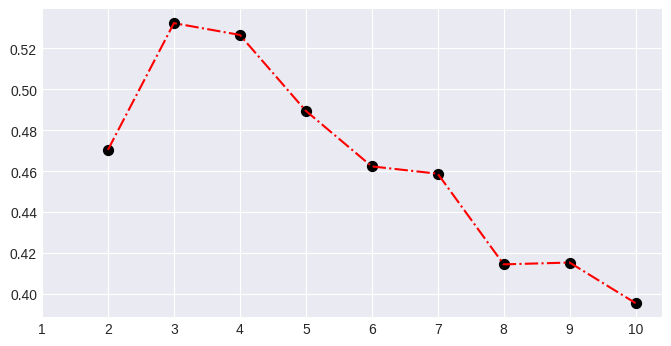

[0.47040913679492186,
 0.5322330314764526,
 0.526488118545087,
 0.4894363304545697,
 0.46231895316690685,
 0.4587458835672447,
 0.4145108628963961,
 0.4153908197416106,
 0.39558643037377633]

In [57]:
#for hierarchical clustering technique with affinity='l1'and linkage='complete'

nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity='l1',linkage='complete')
  l.append(silhouette_score(scaled_features,model.fit_predict(scaled_features)))


#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();


l

In [58]:
# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

0.5322330314764526 for 3 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

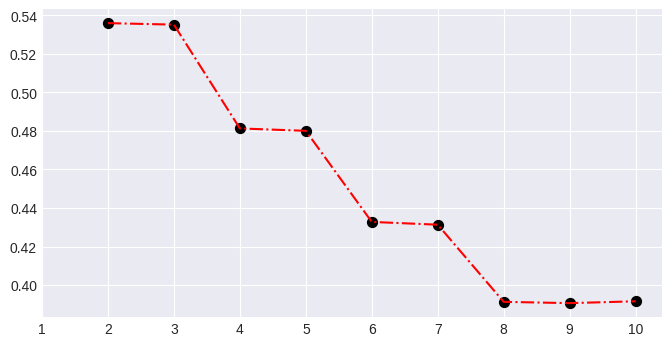

0.535930510919477 for 2 clusters


[0.535930510919477,
 0.5351606918177734,
 0.48129679558120275,
 0.48005487141025094,
 0.4327930185753205,
 0.4313535297638312,
 0.39132817868911945,
 0.39065115753519675,
 0.39161410759857124]

In [59]:
#for hierarchical clustering technique with affinity='l2'and linkage='single'

nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage='single')
  l.append(silhouette_score(scaled_features,model.fit_predict(scaled_features)))


#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();




# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

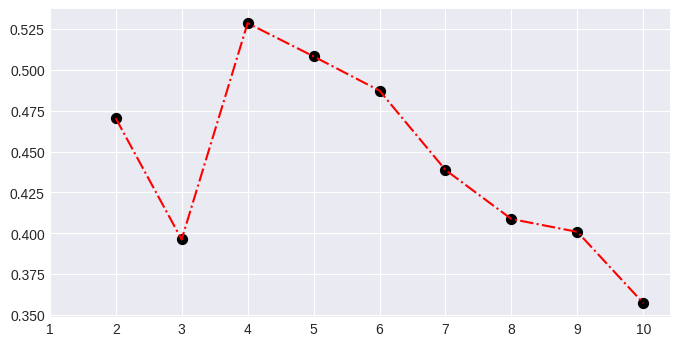

0.5286018409871408 for 4 clusters


[0.47040913679492186,
 0.39619766243707655,
 0.5286018409871408,
 0.5082555071160846,
 0.4872677894382957,
 0.43873250506611094,
 0.4087022964575043,
 0.40082699430237484,
 0.35722100020389563]

In [60]:
#for hierarchical clustering technique with affinity='l2'and linkage='average'

nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage='average')
  l.append(silhouette_score(scaled_features,model.fit_predict(scaled_features)))


#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();



# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

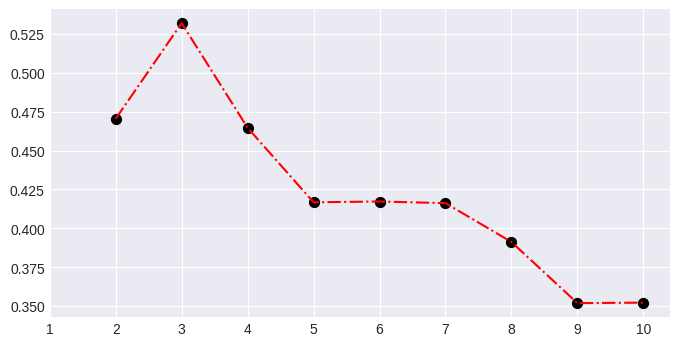

0.5318787367232326 for 3 clusters


[0.47040913679492186,
 0.5318787367232326,
 0.46459708515197673,
 0.4167248248554338,
 0.4172318835123988,
 0.4161868994032843,
 0.39120686651419934,
 0.35190300606505326,
 0.3522324604386131]

In [61]:
#for hierarchical clustering technique with affinity='l2'and linkage='complete'

nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage='complete')
  l.append(silhouette_score(scaled_features,model.fit_predict(scaled_features)))


#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();


# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

l

 **Silhouette score** :Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.Silhouette score is higher the better.<br>


---


We calculated silhouette score for different clustering techniques<br>

Representing highest Silhouette score for each technique:<br>
1. For KMean clustering technique:
> 0.535930510919477  for 2 clusters

2. For hierarchical clustering technique with affinity='l1'and linkage='single'  
> 0.5460574674055123 for 2 clusters

3. For hierarchical clustering technique with affinity='l1'and linkage='average'
> 0.45418920710462085 for 2 clusters

4. For hierarchical clustering technique with affinity='l1'and linkage='complete'
> 0.5322330314764526 for 3 clusters

5. For hierarchical clustering technique with affinity='l2'and linkage='single'
> 0.535930510919477 for 2 clusters

6. For hierarchical clustering technique with affinity='l2'and linkage='average'
> 0.5286018409871408 for 4 clusters

7. For hierarchical clustering technique with affinity='l2'and linkage='complete'
> 0.5318787367232326 for 3 clusters




*   We will avoid using 'single' as  linkage because it mainly focus on the structure


**Elbow Method** : In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

---


> By Elbow Method for Kmeans clustering we got that there shold be 2 clusters.

We will go with

1. Silhouette score for KMean clustering technique:
> 0.535930510919477  for 2 clusters


**We will go ahed with 2 clusters**